In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Image dataset file name 
dataSet ='fruits-360'

# Use os.listdir to check image folder
os.listdir('C:/Users/USER/Downloads/fruits-360/Training')

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

In [40]:
# model training parameter
batch_size = 32
epochs = 10
IMG_HEIGHT = 64
IMG_WIDTH = 64

In [4]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [5]:
# Takes the path to a directory(training) & generates batches of augmented data.
train_dir = 'C:/Users/USER/Downloads/fruits-360/Training'
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical') #categorical=類別

Found 67692 images belonging to 131 classes.


In [6]:
# Takes the path to a directory(testing) & generates batches of augmented data.
validation_dir = 'C:/Users/USER/Downloads/fruits-360/Test'
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              shuffle=True,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 22688 images belonging to 131 classes.


In [7]:
total_train = 67692
total_validation = 22688 

In [8]:
sample_training_images, _ = next(train_data_gen) 

In [9]:
sample_training_images.shape #RGB=3

(32, 64, 64, 3)

In [10]:
# model structure
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(131, activation='softmax')
], name='fruit_cnn')

Instructions for updating:
Colocations handled automatically by placer.


In [46]:
# model learning processing
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), # CategoricalCrossentropy
              metrics=['accuracy'])

In [41]:
# model.fit  
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = val_data_gen,
    validation_steps = total_validation // batch_size
)

Epoch 1/10
2116/2116 [==============================] - 435s 206ms/step - loss: 0.6912 - acc: 0.8666 - val_loss: 0.6913 - val_acc: 0.8553
Epoch 2/10
2116/2116 [==============================] - 336s 159ms/step - loss: 0.6908 - acc: 0.9185 - val_loss: 0.6910 - val_acc: 0.8985
Epoch 3/10
2116/2116 [==============================] - 376s 178ms/step - loss: 0.6907 - acc: 0.9373 - val_loss: 0.6911 - val_acc: 0.8927
Epoch 4/10
2116/2116 [==============================] - 307s 145ms/step - loss: 0.6906 - acc: 0.9530 - val_loss: 0.6910 - val_acc: 0.8977
Epoch 5/10
2116/2116 [==============================] - 313s 148ms/step - loss: 0.6906 - acc: 0.9555 - val_loss: 0.6910 - val_acc: 0.8997
Epoch 6/10
2116/2116 [==============================] - 289s 137ms/step - loss: 0.6905 - acc: 0.9611 - val_loss: 0.6909 - val_acc: 0.9178
Epoch 7/10
2116/2116 [==============================] - 303s 143ms/step - loss: 0.6906 - acc: 0.9589 - val_loss: 0.6909 - val_acc: 0.9137
Epoch 8/10
2116/2116 [============

### 使用heatmap呈現confusion table

Text(0.5, 69.0, 'Predicted label')

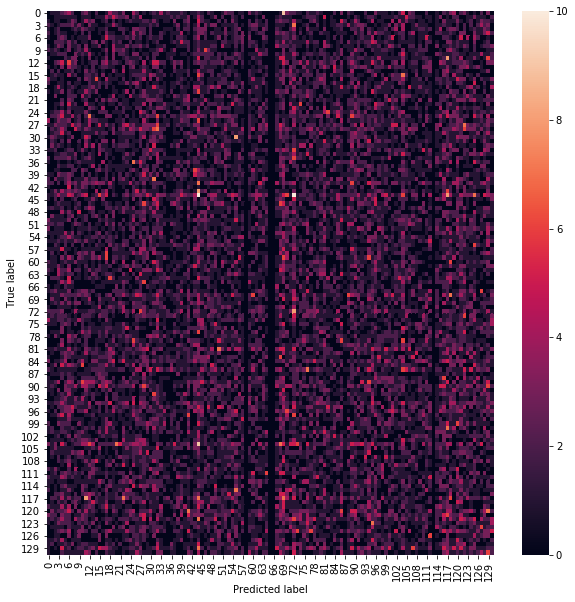

In [45]:
#Confution Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

Y_pred = model.predict_generator(val_data_gen, total_validation // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

plt.figure(figsize=(10, 10))
conf_mat = confusion_matrix(val_data_gen.classes, y_pred)
sns.heatmap(conf_mat,annot=False)
plt.ylabel('True label')
plt.xlabel('Predicted label')

### 結果說明
#### 從上圖無法明顯看出我們所建立的模型的預測能力，加上每個class的資料都沒有很多，因此形成上圖幾乎呈現0-10的情形，若將每項水果所有種類集合起來形成一個class(如:Apple Braeburn,Apple Crimson Snow,Apple Golden 1...集合成Apple)，將能更清楚透過heatmap辨別模型的預測能力
